In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,explained_variance_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#### Recently fascinated with avocado dishes such as avocado sushi, milkshakes, sandwiches and more. So this avocado's data is of great interest to me, let's take a look at what's new.

### I will focus on three questions below. 
- What are the trends in avocado prices in recent years? 
- What are people's preferences for choice？
- Was the Avocadopocalypse of 2017 real?

In [3]:
#import data
avo = pd.read_csv("avocado.csv")

In [4]:
#view data head
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#check data
avo.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
#check info
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
avo.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
#Data cleaning
#drop unnecessary columns
avo = avo.drop(['Unnamed: 0'],axis=1)

In [9]:
#Date to datatime （type）
avo['Date'] = pd.to_datetime(avo['Date'])

In [10]:
#check data
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [12]:
#check year
avo['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [13]:
#check the column of type
avo['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [14]:
#check region
avo['region'].value_counts()

Detroit                338
Jacksonville           338
Houston                338
SouthCentral           338
Spokane                338
Syracuse               338
NewOrleansMobile       338
Midsouth               338
NewYork                338
PhoenixTucson          338
Atlanta                338
SouthCarolina          338
Indianapolis           338
GreatLakes             338
Northeast              338
Plains                 338
Pittsburgh             338
Seattle                338
Philadelphia           338
Albany                 338
StLouis                338
RichmondNorfolk        338
Southeast              338
Columbus               338
BaltimoreWashington    338
Orlando                338
HarrisburgScranton     338
Nashville              338
GrandRapids            338
Sacramento             338
NorthernNewEngland     338
SanDiego               338
Charlotte              338
Tampa                  338
CincinnatiDayton       338
LasVegas               338
BuffaloRochester       338
S

In [15]:
#Total of region
avo['region'].nunique()

54

# Data Explorary

The price is always important. Of course, the more expensive, the better, but the buyer may not be recognized. Let's take a look at the price distribution of our favorite avocados!

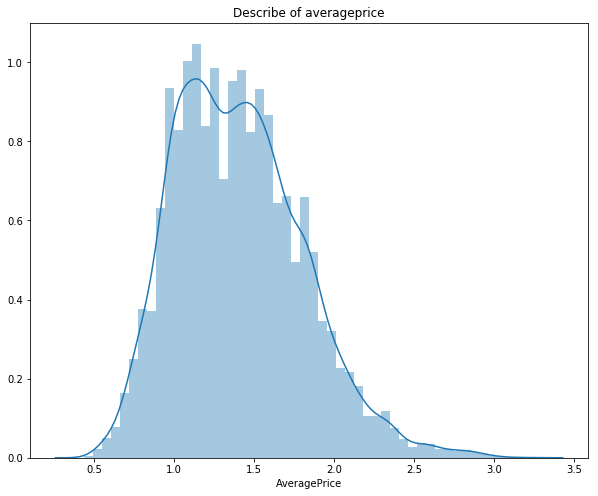

In [16]:
#plot the distribution of averageprice
plt.figure(figsize=(10,8))
plt.title('Describe of averageprice')
ax = sns.distplot(avo['AveragePrice'],bins=50,kde=True)

From this histogram we can see that this is a bimodal one. There are two kinds of avocado organic and conventional in the data, so I think this is the reason for the double peak.

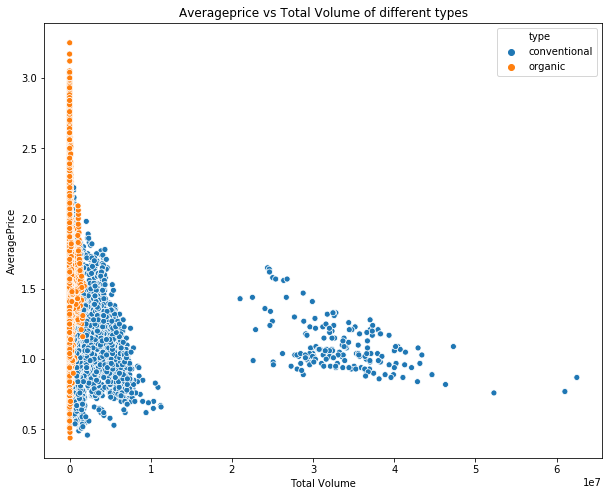

In [17]:
#Averageprice scatter plot for different types of avocados
plt.figure(figsize=(10,8))
plt.title('Averageprice vs Total Volume of different types')
ax =sns.scatterplot(x='Total Volume', y='AveragePrice', hue='type',data=avo)

In this figure, we can see that the price distribution of different kinds of avocados is very different, and the price of organic avocados is generally higher than that of conventional ones.

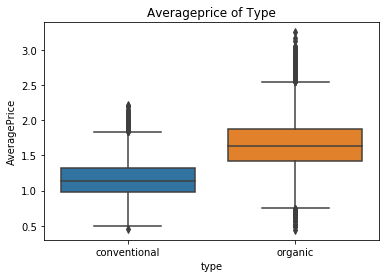

In [18]:
#set plot
plt.title('Averageprice of Type')
ax =  sns.boxplot(x='type', y='AveragePrice', data=avo)

Because organic avocados cost more to grow, they are obviously more expensive. Some people like natural products and are willing to pay a higher price for them. But the price of avocado probably depends not only on the type. Let's take a look at the average price of avocado in different regions.

In [19]:
#groupyby region
byregion = avo.groupby('region').mean()
byregion = byregion.reset_index()

In [20]:
byregion.head()

,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,Albany,1.561036,47537.869734,1824.081775,37621.208254,162.832337,7929.747367,6647.765473,1153.496213,128.488639,2016.147929
1,Atlanta,1.337959,262145.322041,146116.867959,31218.510385,311.385769,84498.560888,51605.727337,32070.044556,822.786036,2016.147929
2,BaltimoreWashington,1.534231,398561.891479,35656.218166,245982.888876,12466.730976,104456.053462,100939.683195,2903.984586,612.382722,2016.147929
3,Boise,1.348136,42642.567308,20019.507604,3461.682367,3186.787840,15974.592456,13840.037249,2103.634083,30.915207,2016.147929
4,Boston,1.530888,287792.854527,4994.610059,214219.864290,4982.294970,63596.085207,58906.590355,4438.364704,251.124231,2016.147929


In [21]:
byregion.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,54.000000
mean,1.405955,8.505751e+05,2.930015e+05,2.951169e+05,22837.438880,2.396171e+05,1.821745e+05,5.433654e+04,3106.069740,2016.147898
std,0.166653,2.419120e+06,8.683353e+05,8.363299e+05,66626.358138,6.768062e+05,5.138323e+05,1.607019e+05,9179.465604,0.000226
min,1.047929,3.237476e+04,9.816233e+02,3.461682e+03,78.368846,7.929747e+03,6.647765e+03,2.269676e+02,21.250651,2016.146269
25%,1.287848,1.052357e+05,2.052716e+04,3.167778e+04,834.040740,3.481852e+04,2.645064e+04,3.273603e+03,258.645022,2016.147929
50%,1.400725,2.120883e+05,5.705663e+04,6.370831e+04,4783.209911,5.569507e+04,4.129541e+04,1.216920e+04,639.571169,2016.147929
75%,1.515947,5.419719e+05,1.677572e+05,2.380421e+05,11830.519808,1.480396e+05,1.158157e+05,3.462434e+04,1239.461501,2016.147929
max,1.818639,1.735130e+07,6.079693e+06,5.961573e+06,462056.754822,4.847931e+06,3.679175e+06,1.105279e+06,63477.013432,2016.147929


In [23]:
?sns.barplot()

Object `sns.barplot()` not found.


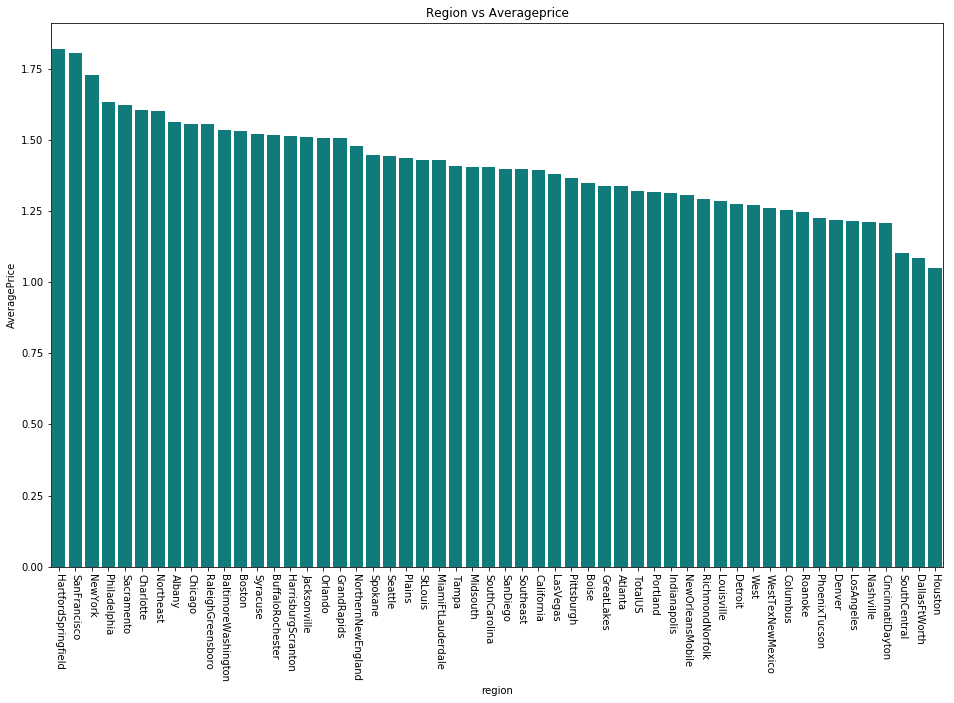

In [27]:
#sort and plot the averageprice of different region
byregiona = byregion.sort_values(by='AveragePrice', ascending=False)
plt.figure(figsize=(16,10))
plt.title('Region vs Averageprice')
ax = sns.barplot(x='region', y='AveragePrice',data=byregiona,color="darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90);

According to the average price comparison, the highest region is HartfordSpringfield about 1.82 a single avocado, the lowest is Houston about 1.05 and the averageprice is 1.41.Then let's look at the sales in these areas.

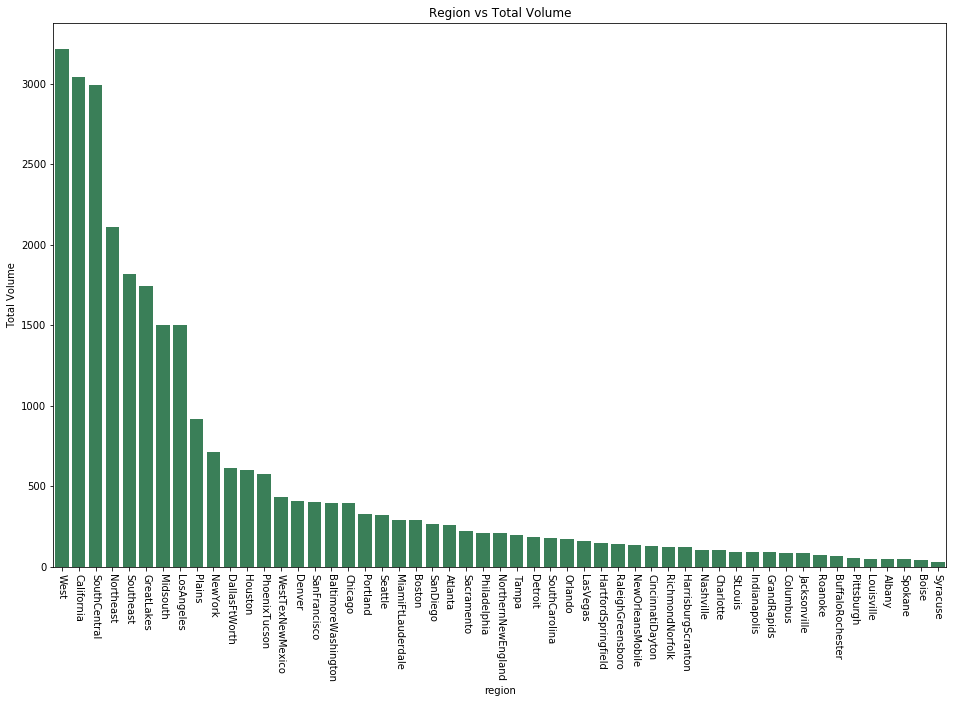

In [25]:
#Of course the totalus is the most，we have to remove it first.
byregion['Total Volume'] = byregion['Total Volume']/1000
byregions = byregion.sort_values(by='Total Volume', ascending=False)
byregions = byregions.reset_index().drop(['index'],axis=1)
byregions = byregions.drop([0])
plt.figure(figsize=(16,10))
plt.title('Region vs Total Volume')
ax = sns.barplot(x='region', y='Total Volume',data=byregions,color="seagreen")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90);

Of course the totalus is the most about more than 17 thousands，so we have to remove it at first.And we can see the highest 3 regions are West, Califormia, and SouthCentral.

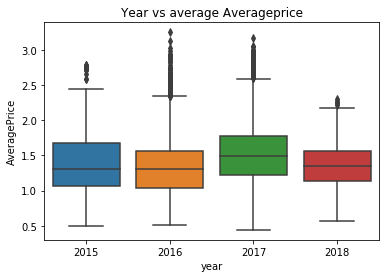

In [28]:
#boxplot of Year vs average Averageprice
plt.title('Year vs average Averageprice')
ax = sns.boxplot(x='year', y='AveragePrice', data=avo)

The average price is highest in 2017, but interestingly, the highest price is in 2016.
Let's take a look at the trends.

In [29]:
import datetime

In [30]:
#Extract month
avo['month'] = [i.month for i in avo['Date']]

In [31]:
avomo = avo[['Date', 'AveragePrice', 'year']]
avomo['month'] = [i.month for i in avomo['Date']]

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
avomo.head()

,Date,AveragePrice,year,month
0,2015-12-27,1.33,2015,12
1,2015-12-20,1.35,2015,12
2,2015-12-13,0.93,2015,12
3,2015-12-06,1.08,2015,12
4,2015-11-29,1.28,2015,11


In [35]:
current_palette = sns.color_palette("dark")

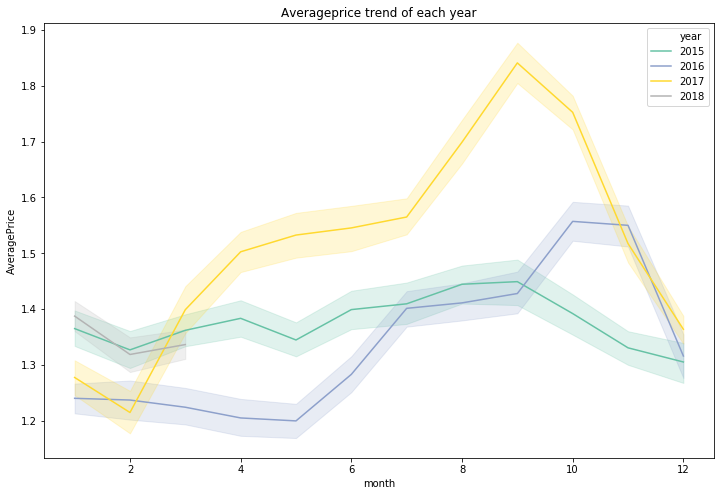

In [39]:
plt.figure(figsize=(12,8))
plt.title('Averageprice trend of each year')
ax = sns.lineplot(x='month', y='AveragePrice', hue='year',
                  markers=True, data=avo,palette="Set2");

Surely organic avocados are good? I'm sorry I haven't felt the difference yet, but how many organic avocados are good for you? I'm just like most people who are more attuned to taste, which is when the avocado is ripe, when it's at its best, or when it's committed to making something delicious. Maybe I'll just be a foodie. Do you like avocados as much as I do? Look forward to sharing more avocado recipes with me~

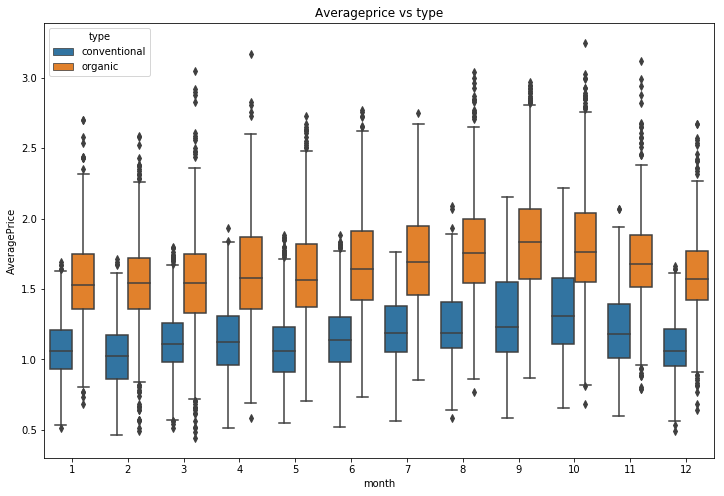

In [29]:
#Averageprice vs type all year
plt.figure(figsize=(12,8))
plt.title('Averageprice vs type')
ax =  sns.boxplot(x='month', y='AveragePrice',hue='type', data=avo)

That's right. Organic avocados have always been expensive。。。

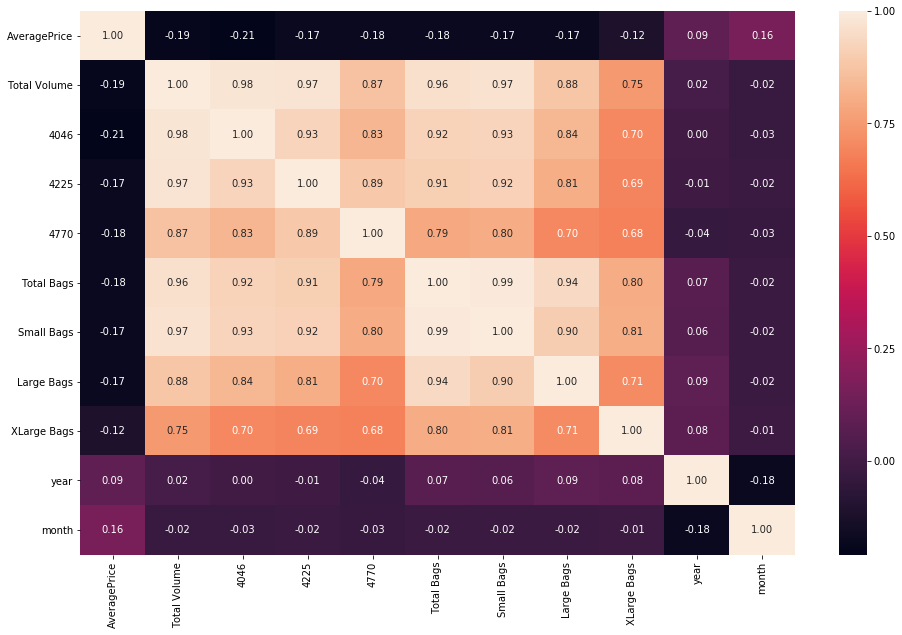

In [30]:
#heatmap of corr
plt.figure(figsize=(16,10))
ax = sns.heatmap(avo.corr(), annot=True, fmt=".2f");

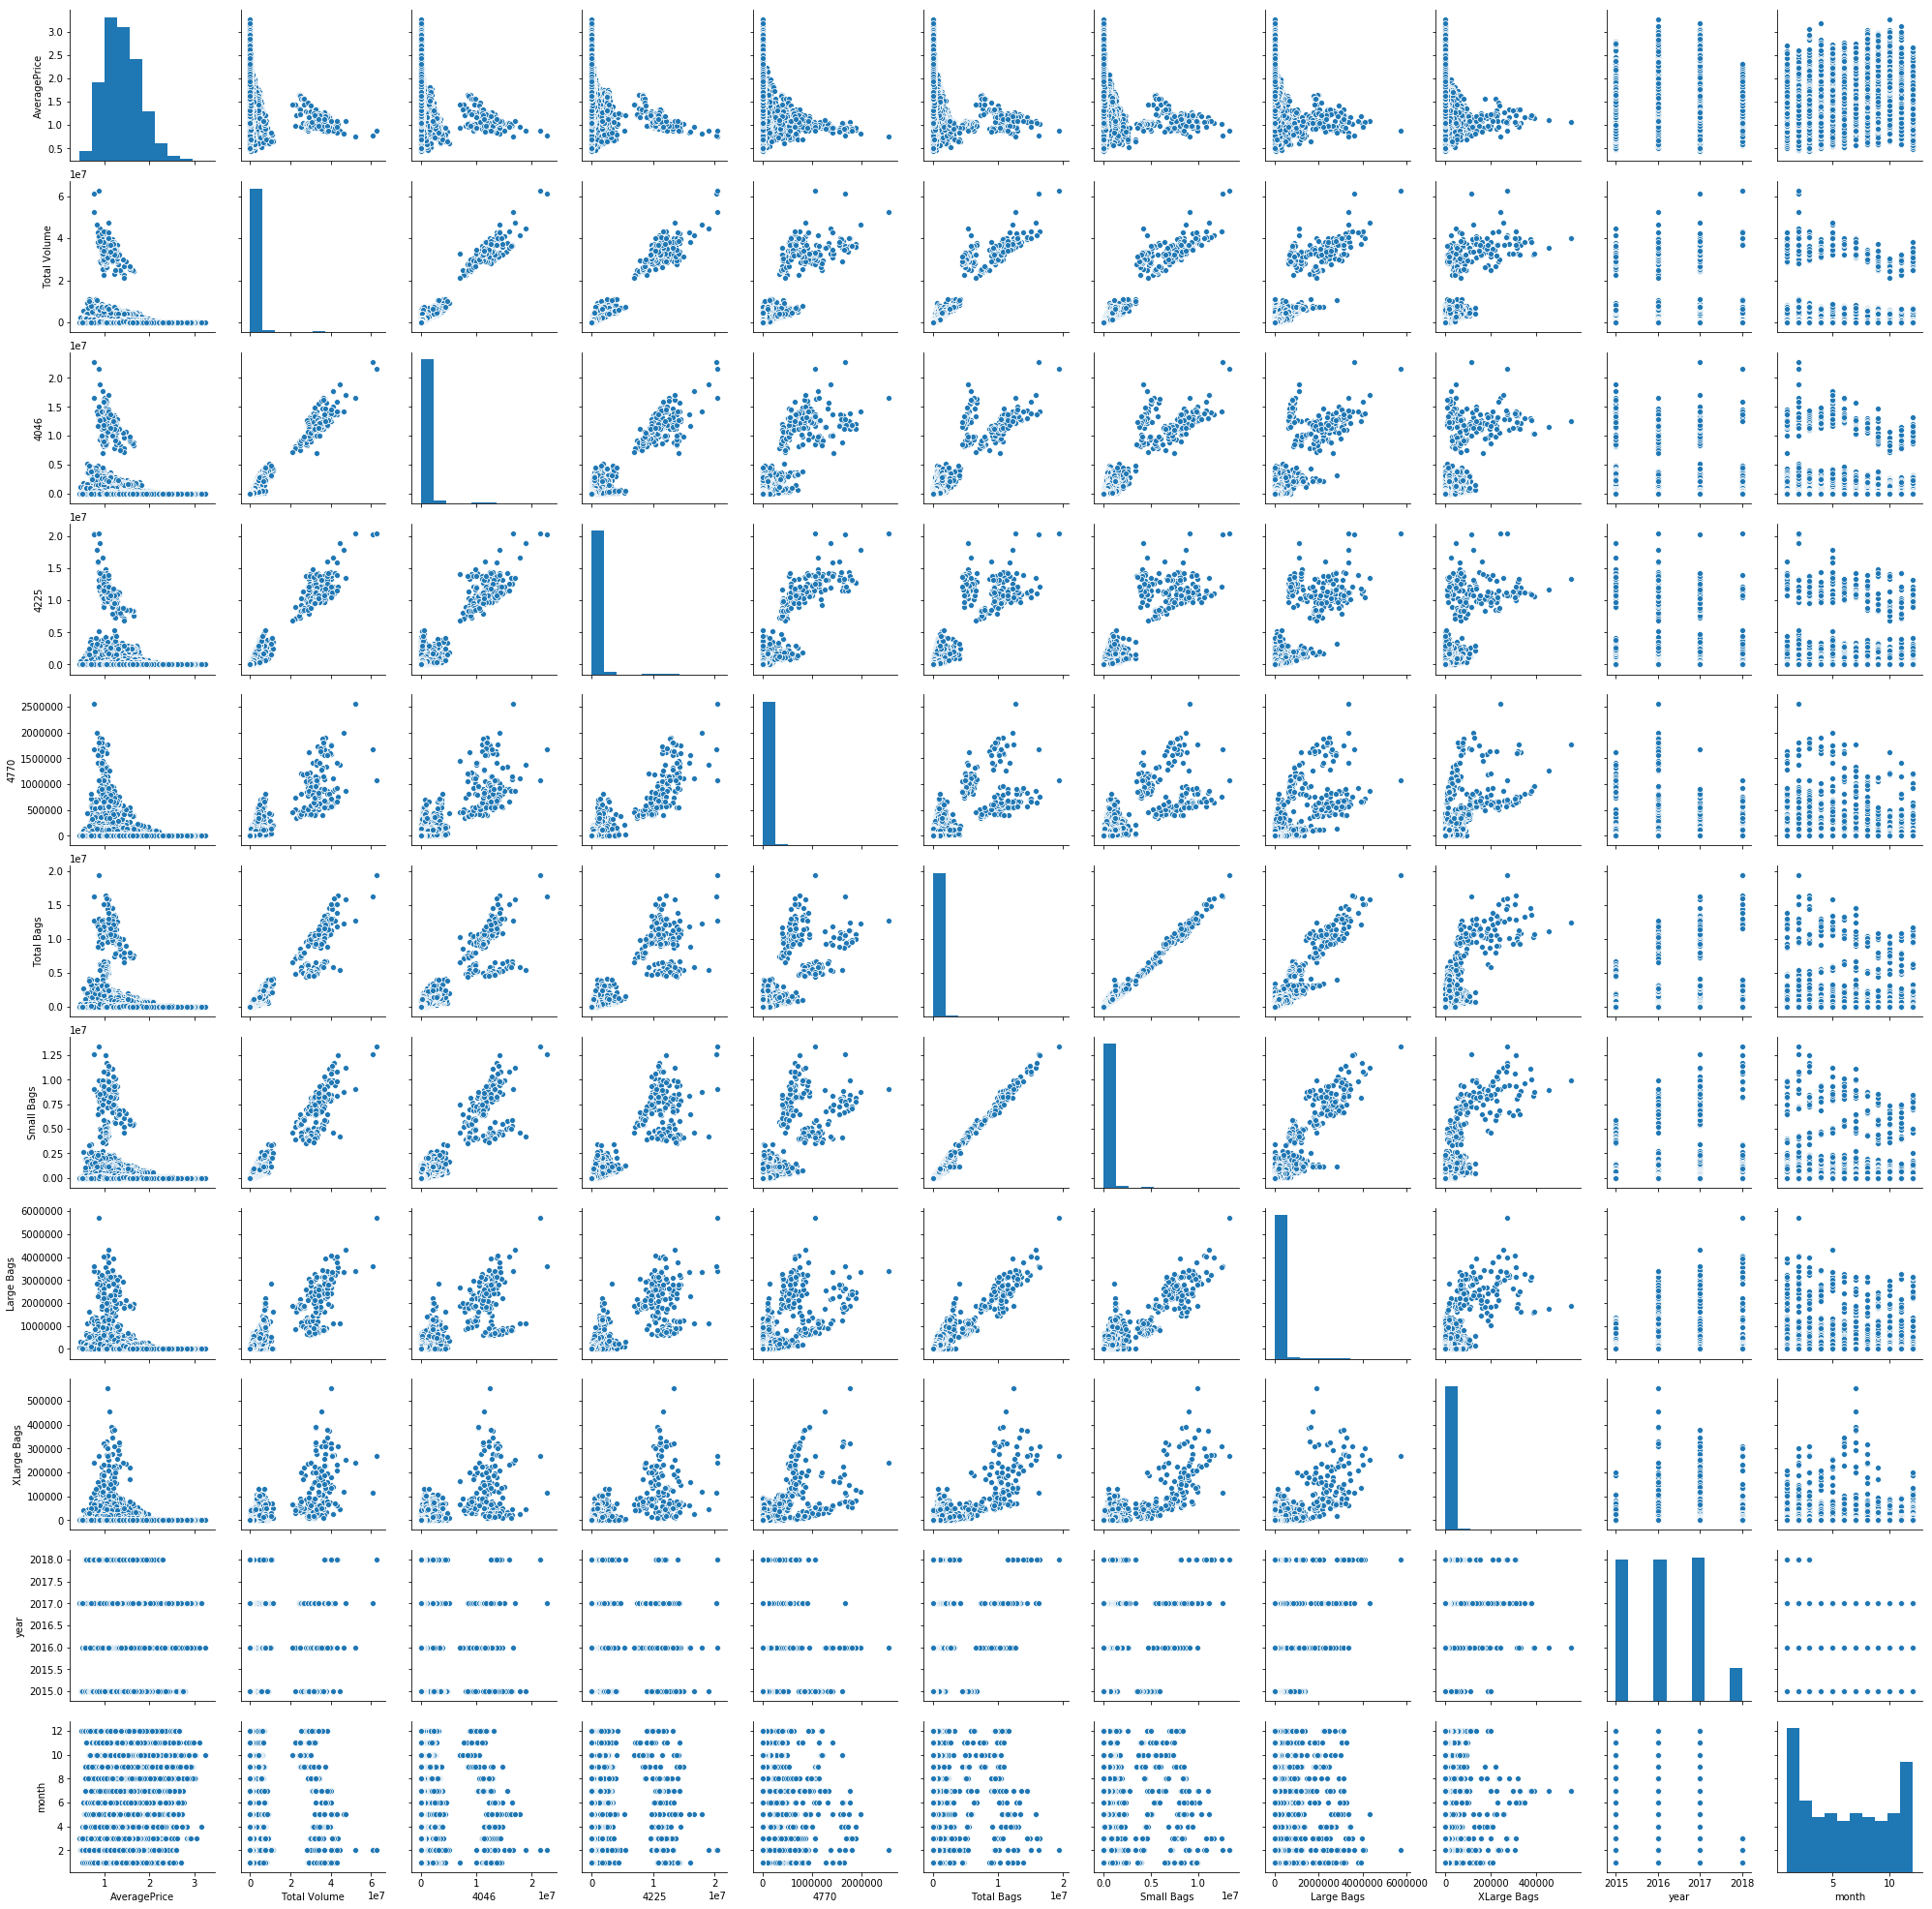

In [31]:
#set pairplot
ax = sns.pairplot(avo, palette="husl")

In [32]:
#groupby month
bymon = avo.groupby(['month']).mean()
bymon = bymon.reset_index()

In [33]:
#check bymon
bymon.head()

,month,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1,1.311019,9.035654e+05,297091.451924,328309.637593,23469.554733,254693.975550,190706.250520,61666.720267,2321.004763,2016.500000
1,2,1.274387,1.018825e+06,356672.920885,348558.374931,28394.881146,285196.078073,213055.035712,68894.364792,3246.677569,2016.500000
2,3,1.332255,8.845054e+05,305386.962173,294504.626585,24952.196558,259658.362021,201308.615027,55152.129385,3197.617609,2016.411765
3,4,1.374380,8.801935e+05,314698.492251,291711.817500,25904.380947,247878.811068,189665.529252,55711.218697,2502.063120,2016.076923
4,5,1.346601,9.727150e+05,349946.910390,336679.188056,28377.930767,257710.995238,193425.140708,61144.593591,3141.260939,2015.928571


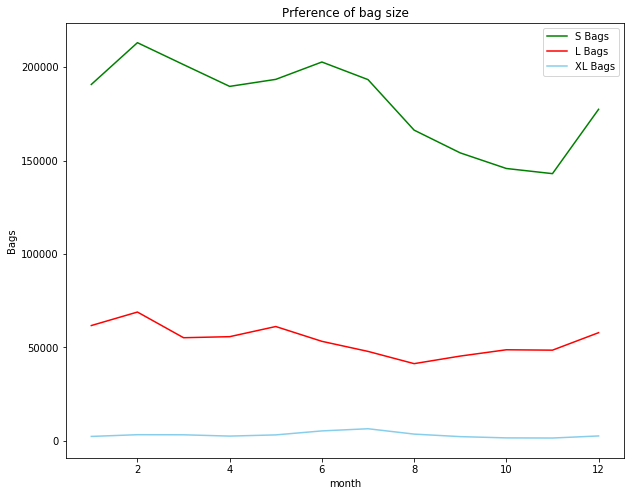

In [34]:
#set lineplot of  bag size
x=bymon['month']
y1=bymon['Small Bags']
y2=bymon['Large Bags']
y3=bymon['XLarge Bags']
plt.figure(figsize=(10,8))
plt.title('Prference of bag size')
plt.plot(x, y1, color='green', label='S Bags')
plt.plot(x, y2, color='red', label='L Bags')
plt.plot(x, y3,  color='skyblue', label='XL Bags')
plt.legend() 
plt.xlabel('month')
plt.ylabel('Bags')
plt.show()

The person who chooses Ssize bag is much higher than L, or XL. That is to say, people are more inclined to buy a small amount of avocados every time they buy. I think avocado is a banana-like food that has the characteristic of decaying once it matures. It is usually not mature in the counter of the supermarket. It is good to eat a little for a few days. If you buy mature avocados, you must eat them immediately. Otherwise, if you buy too much, they may mature at the same time but you can't finish them. That's too. . .So I am also buying avocados in small quantities as many people do.

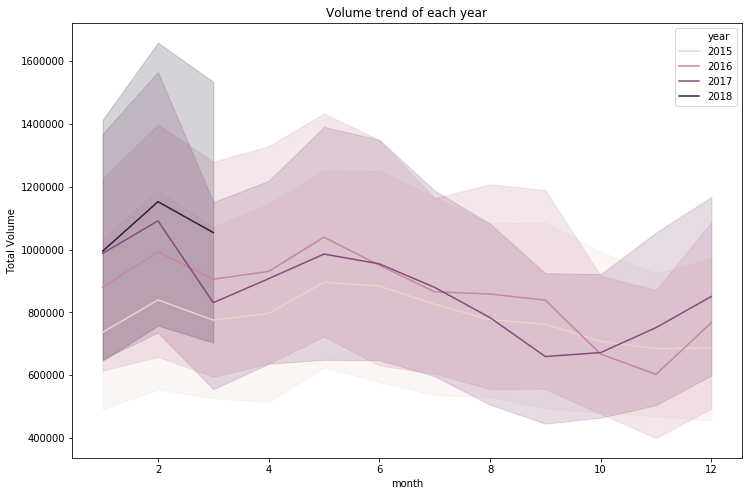

In [35]:
plt.figure(figsize=(12,8))
plt.title('Volume trend of each year')
ax = sns.lineplot(x='month', y='Total Volume', hue='year', data=avo);

From the point of view of sales, the avocados are popular with people's tables. There was even a shortage in 2017 from google.why? Taste? health? Or appearance? Perhaps it is people's curiosity about new things. For example, the Super Bowl has developed avocado-related products, even if the goddess Miranda Kerco has contributed specifically to this... Then, the marketer set a position for the avocado - the luxury in the fruit.

No matter what age, luxury goods are always hot. The same is true for avocados. It is the flag of health, petty bourgeoisie and weight loss... The luxury goods in fruits are getting louder and louder, and the price of avocado is rising!

In [36]:
#set groupby date
bydate = avo.groupby('Date').mean()
bydate = bydate.reset_index()
#check bydate
bydate.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
0,2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015,1
1,2015-01-11,1.370648,7.273686e+05,287260.786944,303781.757778,21751.550463,114574.490370,95860.522407,18313.259259,400.708704,2015,1
2,2015-01-18,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015,1
3,2015-01-25,1.397130,7.080211e+05,299121.600648,267862.244167,19244.248704,121793.027500,100715.897685,20859.406667,217.723148,2015,1
4,2015-02-01,1.247037,1.106048e+06,465675.823704,469409.541481,34143.419537,136819.689815,107192.904167,28462.864722,1163.920926,2015,2


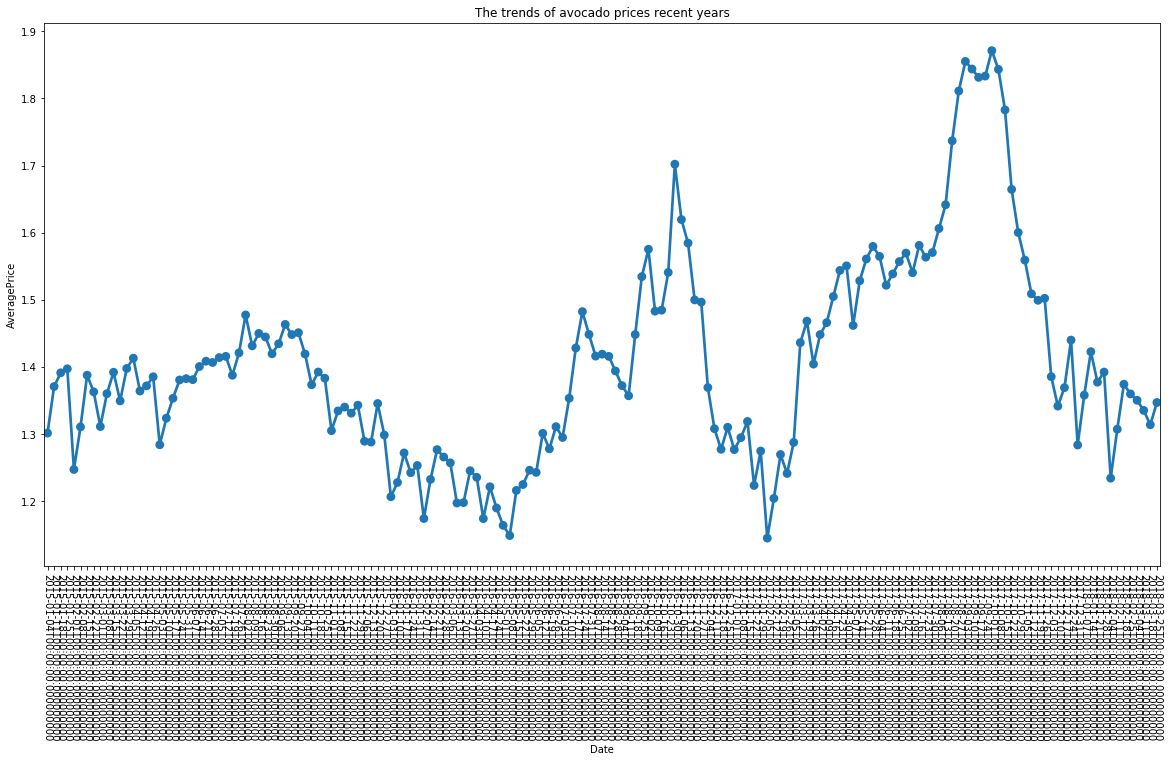

In [37]:
#plot lineplot
plt.figure(figsize=(20,10))
plt.title("The trends of avocado prices recent years")
ax = sns.pointplot(x='Date', y='AveragePrice',data=bydate)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90);

There is an illusion in the world that avocados can only be afforded by the upper class, and it is also a nutritious food that best matches the identity of the upper class.Of course, avocado does have a lot of nutrients, but the truth is far from exaggerated, which means that the success of avocado is more from propaganda and hype.

So give everyone a wake up, even if there is something more nutritious, you need to eat rationally, don't blindly listen to the propaganda.... Rational consumption is actually applicable to all foods, you can eat, but eat in moderation, I believe everyone should always be at heart.

# Data Preparation

In [38]:
#convert type into dummies
dum_type = pd.get_dummies(avo['type'])
avo = pd.concat([avo, dum_type], axis=1)

In [39]:
#convert region into codes
avo['region'] = avo['region'].astype('category')
avo['region'] = avo['region'].cat.codes

# bulid model

In [40]:
#bulid model

X_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
             'conventional', 'organic','region', 'month']

X = avo[X_columns]
y = avo['AveragePrice']

In [41]:
# check X , Y shape
print(X.shape,y.shape)

(18249, 13) (18249,)


In [42]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,conventional,organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12,1,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12,1,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12,1,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,12,1,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11,1,0


In [43]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [44]:
#set lm mod
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

# Predictions
y_test_preds = lm_model.predict(X_test)
#Rsquared
r2_test = r2_score(y_test, y_test_preds)

#Print r2
r2_test

0.44417385776556784

In [45]:
#set xgboost model
mod = xgb.XGBRegressor()
mod.fit(X_train, y_train)
y_test_preds = mod.predict(X_test)

y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

#print MSE and R^2
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE train : 0.037, test : 0.040
R^2 train : 0.767, test : 0.757


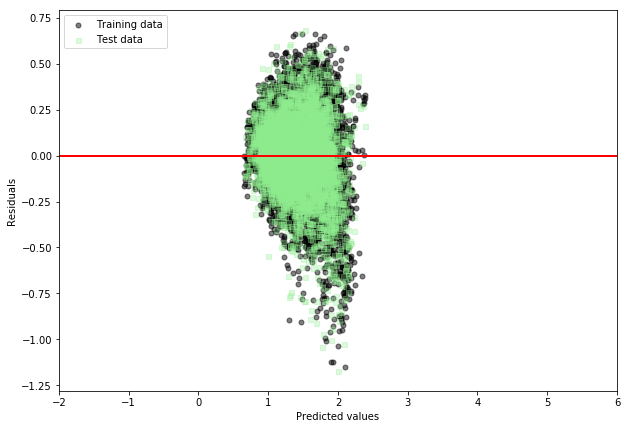

In [46]:
#plot results
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 25, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 25, alpha = 0.3, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-2, 6])
plt.show()

In [47]:
#Cross-validation and search best_params
params = {'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1], 'subsample': [0.8, 0.85, 0.9], 'colsample_bytree': [0.5, 1.0]}

mod = xgb.XGBRegressor()
clf = GridSearchCV(mod, params, cv = 5, n_jobs = 1)
clf.fit(X_train, y_train)


c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureW

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureW

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureW

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureW

c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\19156\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureW

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1], 'subsample': [0.8, 0.85, 0.9], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
#print result
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))



MSE train : 0.001, test : 0.014
R^2 train : 0.991, test : 0.918


In [49]:
#print best score and best params
print(clf.best_score_)
print(clf.best_params_)

0.9017019388327472
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.85}


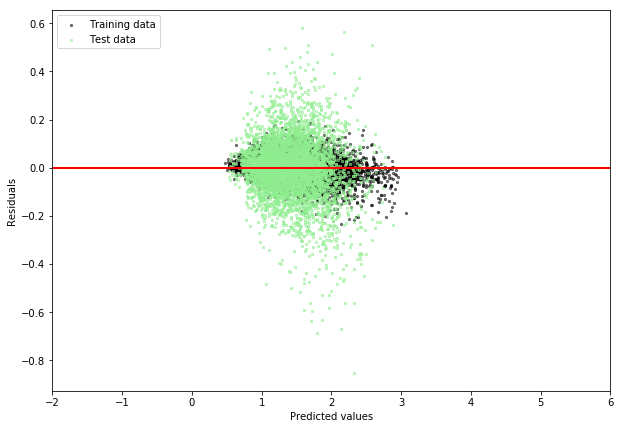

In [50]:
#plot result
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 5, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 5, alpha = 0.5, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-2, 6])
plt.show()